## Financial Metrics and Calculations

#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

----------------

#### Generate a Random Data Set

In [6]:
#generate random financial data for 20 subsidiaries
np.random.seed(42)
n_subsidiaries = 20

data = {
    "Part of the Company": [f"Subsidiary {i+1}" for i in range(n_subsidiaries)], #name subsidiaries
    "Investment Cost": np.random.randint(5000, 20000, size=n_subsidiaries),
    "Profit": np.random.randint(10000, 50000, size=n_subsidiaries),
    "Fixed Costs": np.random.randint(5000, 20000, size=n_subsidiaries),
    "Variable Cost per Unit": np.random.randint(5, 50, size=n_subsidiaries),
    "Price per Unit": np.random.randint(15, 100, size=n_subsidiaries),
    "Units Sold": np.random.randint(500, 5000, size=n_subsidiaries),
    "Discount Rate": np.random.uniform(.05, .2, size=n_subsidiaries),
    "Cash Flows (Year 1)": np.random.randint(2000, 10000, size=n_subsidiaries),
    "Cash Flows (Year 2)": np.random.randint(2000, 10000, size=n_subsidiaries),
    "Cash Flows (Year 3)": np.random.randint(2000, 10000, size=n_subsidiaries),
    "Cash Flows (Year 4)": np.random.randint(2000, 10000, size=n_subsidiaries),
    "Cash Flows (Year 5)": np.random.randint(2000, 10000, size=n_subsidiaries)
}

df = pd.DataFrame(data)

#insert a "mother company" column with random financial data
mother_company_data = {
    "Part of the Company": "Mother Company",
    "Investment Cost": np.random.randint(50000, 200000),
    "Profit": np.random.randint(100000, 500000),
    "Fixed Costs": np.random.randint(50000, 200000),
    "Variable Cost per Unit": np.random.randint(5, 50),
    "Price per Unit": np.random.randint(15, 100),
    "Units Sold": np.random.randint(5000, 50000),
    "Discount Rate": np.random.uniform(.05, .2),
    "Cash Flows (Year 1)": np.random.randint(20000, 100000),
    "Cash Flows (Year 2)": np.random.randint(20000, 100000),
    "Cash Flows (Year 3)": np.random.randint(20000, 100000),
    "Cash Flows (Year 4)": np.random.randint(20000, 100000),
    "Cash Flows (Year 5)": np.random.randint(20000, 100000)
}

#convert mother company data to data frame
mother_company_df = pd.DataFrame(mother_company_data, index=[0])

#insert the mother company row at the beginning of the data frame
df.loc[-1] = mother_company_df.iloc[0]
df.index = df.index + 1
df = df.sort_index()

#show the whole data frame
df

,Part of the Company,Investment Cost,Profit,Fixed Costs,Variable Cost per Unit,Price per Unit,Units Sold,Discount Rate,Cash Flows (Year 1),Cash Flows (Year 2),Cash Flows (Year 3),Cash Flows (Year 4),Cash Flows (Year 5)
0,Mother Company,72671,455528,136202,10,94,20708,0.178754,22811,76250,92082,54754,31411
1,Subsidiary 1,12270,12433,8556,11,28,3068,0.134192,8700,7504,2663,3636,7791
2,Subsidiary 2,5860,15311,8890,48,62,2527,0.165645,3597,7496,3998,5696,3733
3,Subsidiary 3,10390,47819,13838,12,29,3195,0.124069,5060,3306,9994,4999,7535
4,Subsidiary 4,18418,49188,19356,39,86,1995,0.128410,4693,6029,5445,5152,8390
5,Subsidiary 5,10191,27568,16080,18,92,891,0.114131,6891,8776,5743,2698,6931
6,Subsidiary 6,16964,29769,19502,21,76,4974,0.053813,7147,4675,7727,4160,5510
7,Subsidiary 7,16284,38693,10393,40,54,4061,0.066184,7739,7068,3495,6097,2202
8,Subsidiary 8,10734,16396,15627,44,99,2778,0.054714,5627,7864,5304,6737,5255
9,Subsidiary 9,11265,37480,13792,8,94,3599,0.145462,3363,3282,5763,8363,6218


-------------

#### General Data Analyis of our DataFrame

##### Investment Cost

In [10]:
print(f'- total: {df["Investment Cost"].sum()}')
print(f'- mean: {round(df["Investment Cost"].mean(), 2)}')
print(f'- median: {df["Investment Cost"].median()}')
print(f'- standard deviation: {df["Investment Cost"].std()}')

- total: 323352
- mean: 15397.71
- median: 12270.0
- standard deviation: 13863.229144549468


##### Profit

In [12]:
print(f'- total: {df["Profit"].sum()}')
print(f'- mean: {round(df["Profit"].mean(), 2)}')
print(f'- median: {df["Profit"].median()}')
print(f'- standard deviation: {df["Profit"].std()}')

- total: 1007154
- mean: 47959.71
- median: 28942.0
- standard deviation: 94258.813929066


##### Fixed Costs

In [14]:
print(f'- total: {df["Fixed Costs"].sum()}')
print(f'- mean: {round(df["Fixed Costs"].mean(), 2)}')
print(f'- median: {df["Fixed Costs"].median()}')
print(f'- standard deviation: {df["Fixed Costs"].std()}')

- total: 406168
- mean: 19341.33
- median: 13838.0
- standard deviation: 26968.513582200514


##### Variable Cost per Unit

In [16]:
print(f'- total: {df["Variable Cost per Unit"].sum()}')
print(f'- mean: {round(df["Variable Cost per Unit"].mean(), 2)}')
print(f'- median: {df["Variable Cost per Unit"].median()}')
print(f'- standard deviation: {df["Variable Cost per Unit"].std()}')

- total: 546
- mean: 26.0
- median: 22.0
- standard deviation: 15.316657598836633


##### Price per Unit

In [18]:
print(f'- total: {df["Price per Unit"].sum()}')
print(f'- mean: {round(df["Price per Unit"].mean(), 2)}')
print(f'- median: {df["Price per Unit"].median()}')
print(f'- standard deviation: {df["Price per Unit"].std()}')

- total: 1379
- mean: 65.67
- median: 67.0
- standard deviation: 24.317346346452634


##### Units Sold

In [20]:
print(f'- total: {df["Units Sold"].sum()}')
print(f'- mean: {round(df["Units Sold"].mean(), 2)}')
print(f'- median: {df["Units Sold"].median()}')
print(f'- standard deviation: {df["Units Sold"].std()}')

- total: 78135
- mean: 3720.71
- median: 3190.0
- standard deviation: 4053.73695672101


##### Discount Rate

In [22]:
print(f'- total: {df["Discount Rate"].sum()}')
print(f'- mean: {round(df["Discount Rate"].mean(), 2)}')
print(f'- median: {df["Discount Rate"].median()}')
print(f'- standard deviation: {df["Discount Rate"].std()}')

- total: 2.4401986022784095
- mean: 0.12
- median: 0.11413115275378245
- standard deviation: 0.04359326716535365


##### Cash Flows

In [24]:
print("Year 1:")
print(f'- total: {df["Cash Flows (Year 1)"].sum()}')
print(f'- mean: {round(df["Cash Flows (Year 1)"].mean(), 2)}')
print(f'- median: {df["Cash Flows (Year 1)"].median()}')
print(f'- standard deviation: {df["Cash Flows (Year 1)"].std()}')

Year 1:
- total: 144292
- mean: 6871.05
- median: 5627.0
- standard deviation: 4253.627575096231


In [25]:
print("Year 2:")
print(f'- total: {df["Cash Flows (Year 2)"].sum()}')
print(f'- mean: {round(df["Cash Flows (Year 2)"].mean(), 2)}')
print(f'- median: {df["Cash Flows (Year 2)"].median()}')
print(f'- standard deviation: {df["Cash Flows (Year 2)"].std()}')

Year 2:
- total: 212005
- mean: 10095.48
- median: 7353.0
- standard deviation: 15288.488848212068


In [26]:
print("Year 3:")
print(f'- total: {df["Cash Flows (Year 3)"].sum()}')
print(f'- mean: {round(df["Cash Flows (Year 3)"].mean(), 2)}')
print(f'- median: {df["Cash Flows (Year 3)"].median()}')
print(f'- standard deviation: {df["Cash Flows (Year 3)"].std()}')

Year 3:
- total: 219296
- mean: 10442.67
- median: 5763.0
- standard deviation: 18841.10134077446


In [27]:
print("Year 4:")
print(f'- total: {df["Cash Flows (Year 4)"].sum()}')
print(f'- mean: {round(df["Cash Flows (Year 4)"].mean(), 2)}')
print(f'- median: {df["Cash Flows (Year 4)"].median()}')
print(f'- standard deviation: {df["Cash Flows (Year 4)"].std()}')

Year 4:
- total: 174742
- mean: 8321.05
- median: 6097.0
- standard deviation: 10813.815429700058


In [28]:
print("Year 5:")
print(f'- total: {df["Cash Flows (Year 5)"].sum()}')
print(f'- mean: {round(df["Cash Flows (Year 5)"].mean(), 2)}')
print(f'- median: {df["Cash Flows (Year 5)"].median()}')
print(f'- standard deviation: {df["Cash Flows (Year 5)"].std()}')

Year 5:
- total: 149391
- mean: 7113.86
- median: 6218.0
- standard deviation: 5993.107677037968


------------------

#### Visualizing Cash Flows

In [31]:
df_cashflows = df.drop(df.columns[1:8], axis=1)
df_cashflows

,Part of the Company,Cash Flows (Year 1),Cash Flows (Year 2),Cash Flows (Year 3),Cash Flows (Year 4),Cash Flows (Year 5)
0,Mother Company,22811,76250,92082,54754,31411
1,Subsidiary 1,8700,7504,2663,3636,7791
2,Subsidiary 2,3597,7496,3998,5696,3733
3,Subsidiary 3,5060,3306,9994,4999,7535
4,Subsidiary 4,4693,6029,5445,5152,8390
5,Subsidiary 5,6891,8776,5743,2698,6931
6,Subsidiary 6,7147,4675,7727,4160,5510
7,Subsidiary 7,7739,7068,3495,6097,2202
8,Subsidiary 8,5627,7864,5304,6737,5255
9,Subsidiary 9,3363,3282,5763,8363,6218


##### Cash Flows for Mother Company AND Subsidiaries

In [33]:
df_lang = pd.melt(df, 
                  id_vars=['Part of the Company'], 
                  value_vars=['Cash Flows (Year 1)', 'Cash Flows (Year 2)', 
                              'Cash Flows (Year 3)', 'Cash Flows (Year 4)', 
                              'Cash Flows (Year 5)'],
                  var_name='Year', value_name='Cash Flow')

#clean and adapt year column
df_lang['Year'] = df_lang['Year'].str.extract('(\d+)')
df_lang['Year'] = df_lang['Year'].astype(int)

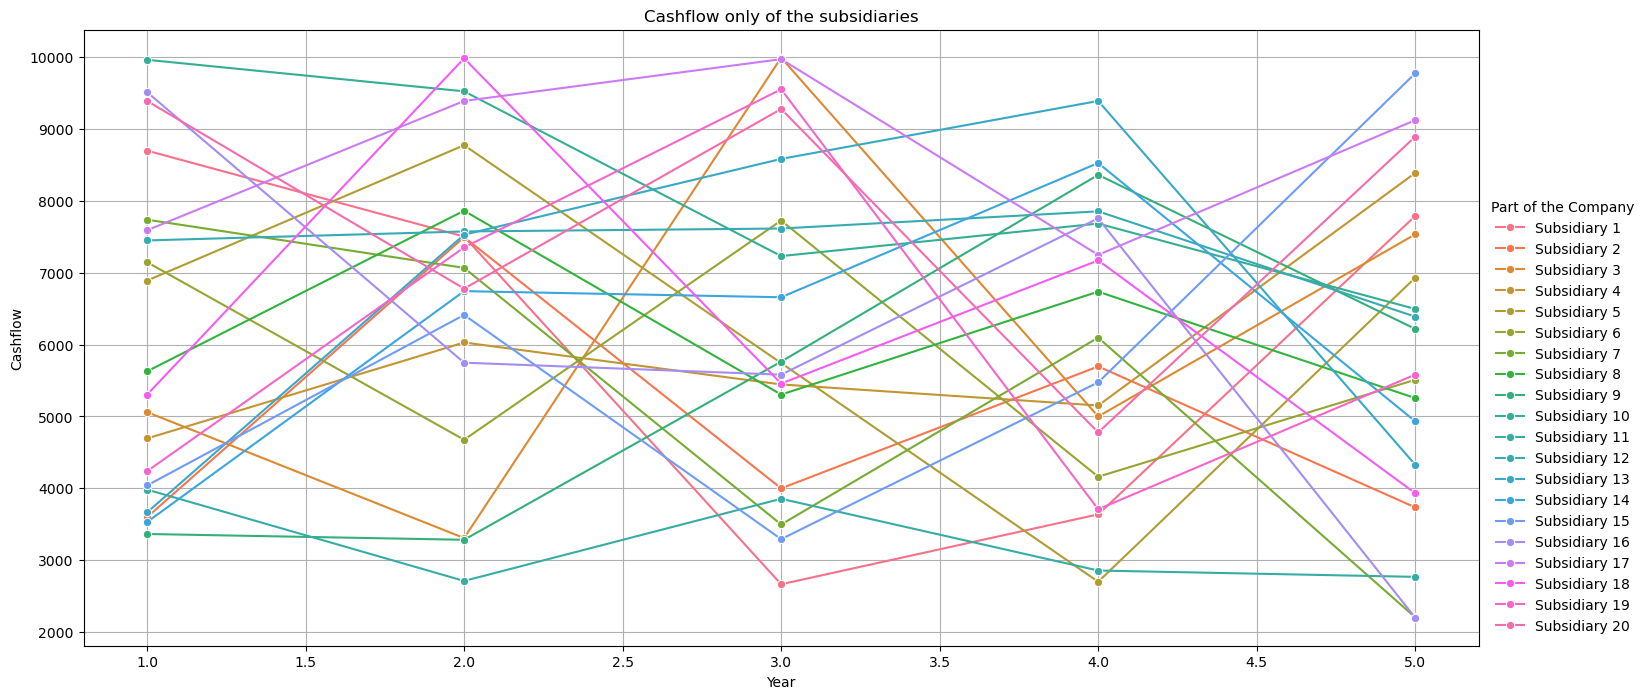

In [68]:
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='Year', y='Cash Flow', hue='Part of the Company', data=df_lang, marker='o')
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0), frameon=False)
plt.title('Cashflow only of the subsidiaries')
plt.xlabel('Year')
plt.ylabel('Cashflow')
plt.grid(True)
plt.show()

##### Cash Flows only for subsidiaries

In [36]:
df_cashflows = df.drop(df.columns[1:8], axis=1)
df_cashflows = df.drop(0)
df_cashflows.head()

,Part of the Company,Investment Cost,Profit,Fixed Costs,Variable Cost per Unit,Price per Unit,Units Sold,Discount Rate,Cash Flows (Year 1),Cash Flows (Year 2),Cash Flows (Year 3),Cash Flows (Year 4),Cash Flows (Year 5)
1,Subsidiary 1,12270,12433,8556,11,28,3068,0.134192,8700,7504,2663,3636,7791
2,Subsidiary 2,5860,15311,8890,48,62,2527,0.165645,3597,7496,3998,5696,3733
3,Subsidiary 3,10390,47819,13838,12,29,3195,0.124069,5060,3306,9994,4999,7535
4,Subsidiary 4,18418,49188,19356,39,86,1995,0.128410,4693,6029,5445,5152,8390
5,Subsidiary 5,10191,27568,16080,18,92,891,0.114131,6891,8776,5743,2698,6931


In [37]:
df_lang = pd.melt(df_cashflows, 
                  id_vars=['Part of the Company'], 
                  value_vars=['Cash Flows (Year 1)', 'Cash Flows (Year 2)', 
                              'Cash Flows (Year 3)', 'Cash Flows (Year 4)', 
                              'Cash Flows (Year 5)'],
                  var_name='Year', value_name='Cash Flow')

#clean and adapt year column
df_lang['Year'] = df_lang['Year'].str.extract('(\d+)')
df_lang['Year'] = df_lang['Year'].astype(int)

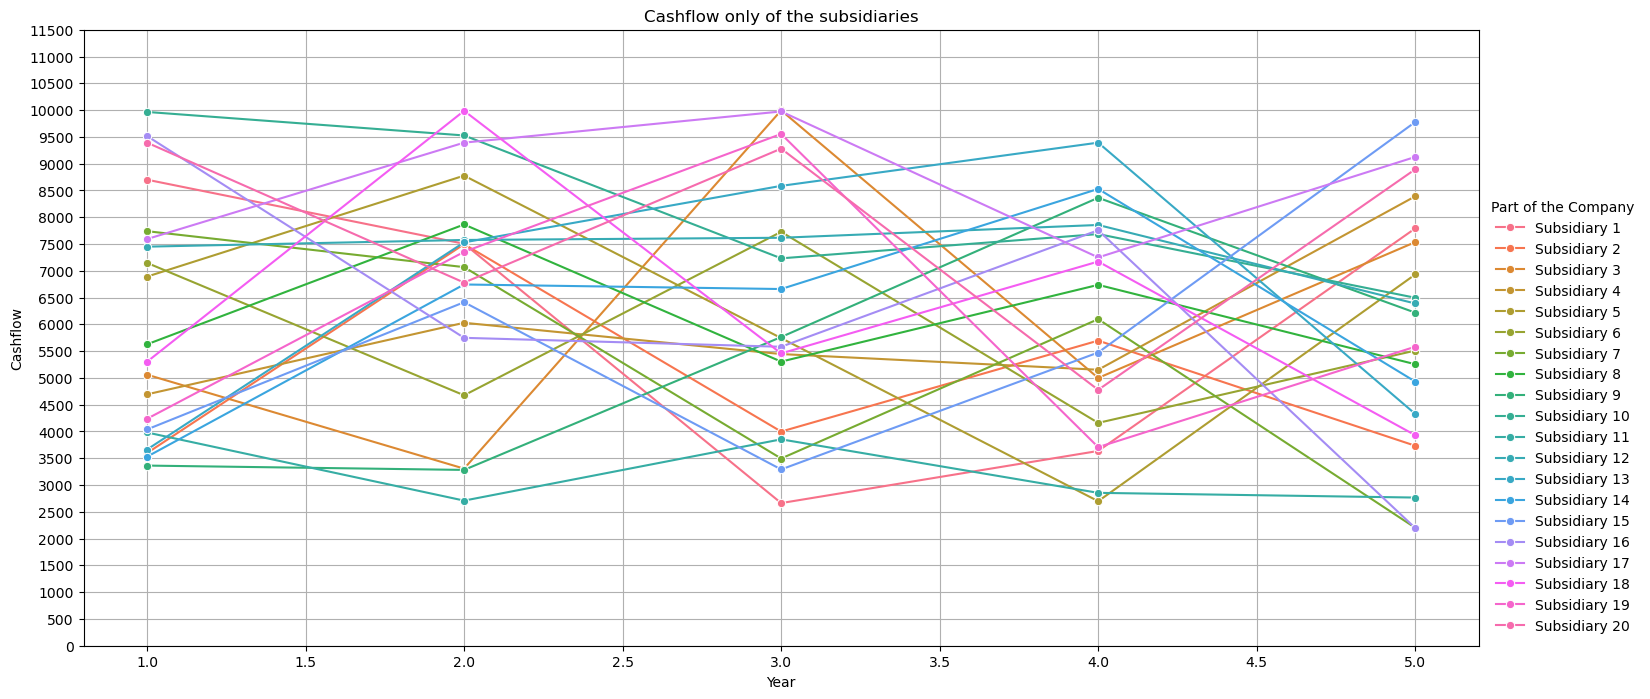

In [38]:
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='Year', y='Cash Flow', hue='Part of the Company', data=df_lang, marker='o')
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0), frameon=False)
plt.yticks(range(0, max(df_lang["Cash Flow"]) + 2000, 500))
#plt.ylim(2000, 11000)
plt.title('Cashflow only of the subsidiaries')
plt.xlabel('Year')
plt.ylabel('Cashflow')
plt.grid(True)
plt.show()

-------------

#### Calculating ROI, Break-Even Quantity, Contribution Margin and Net Present Value

**Return on Investment (ROI):**
- formula: roi = ((profit - investment_cost) / investment_cost) * 100
- Profit: The profit earned from the investment
- Investment Cost: The initial cost of the investment
- ROI tells you how much return (profit) you get for every dollar you invest. For example, an ROI of 20% means that for every 100 dollars invested, you earn 120 dollars (a 20 dollars profit)

</br>

**Break-Even Quantity:**
- formula: break_even_quantity = fixed_costs / (price_per_unit - variable_cost_per_unit)
- tells you how many units you need to sell to cover all your costs (fixed + variable)
- Fixed Costs: The costs that do not change regardless of how many units are sold (e.g., rent, salaries)
- Price per Unit: The selling price for each unit
- Variable Cost per Unit: The cost incurred for each unit produced (e.g., material costs, labor costs per unit)
- the result is the number of units you need to sell to cover all fixed costs. After this point, any additional sales will contribute to profit.

</br>

**Break-Even Point:**
- formula: break_even_point_revenue = fixed_costs / (1 - (variable_cost_per_unit / price_per_unit)
- the Break-Even Point is the amount of revenue required to cover both fixed and variable costs, resulting in zero profit or loss. It tells you how much total sales revenue needs to be generated to break even, meaning no net profit or loss.
- Fixed Costs: The costs that do not change with production or sales volume (e.g., rent, salaries).
- Variable Cost per Unit: The cost that varies with each unit produced or sold (e.g., materials, labor).
- Price per Unit: The selling price for each unit of product or service.
- the formula calculates the minimum amount of revenue needed to cover fixed costs. It accounts for both variable costs (which change with the number of units sold) and price per unit (how much you charge per product). The break-even revenue is the total sales amount you need to achieve in order to cover all expenses and make zero profit.

</br>

**Contribution Margin:**
- formula: contribution_margin = (price_per_unit - variable_cost_per_unit) * units_sold
- this formula calculates the Total Contribution Margin, which measures the total amount of money contributed by the sales to cover fixed costs and contribute to profits
- Price per Unit: The selling price of each unit
- Variable Cost per Unit: The cost of producing one unit
- Units Sold: The total number of units sold
- the contribution margin is important because it shows how much money is left over after covering the variable costs, which can then be used to cover fixed costs or contribute to profits

</br>

**Net Present Value (NPV):**
- formula: npv = sum(cash_flows[t] / ((1 + discount_rate) ** t) for t in range(5))
- this formula calculates the Net Present Value (NPV), which measures the total value of future cash flows in today's money
- NPV is often used to evaluate the profitability of an investment or project.
- cash_flows[t]: The cash flow (net inflow or outflow) in year t. This is the money coming into or out of the project or investment at a specific time (e.g., year 1, year 2, etc.)
- discount_rate: The discount rate (also known as the required rate of return) is the rate at which future cash flows are discounted to reflect their present value. This accounts for the fact that money today is worth more than money in the future.
- t: The time period (in years) for which the cash flow is considered. The sum is taken over all time periods, in this case, 5 years.
- calculation: for each time period t (from year 0 to year 4), the formula discounts the cash flow of that year by dividing it by (1 + discount_rate) ** t, which represents the time value of money (i.e., the value of future cash flows in today's terms). NPV is the sum of these discounted values for each year.
- result: NPV tells you whether the investment is worth it. If NPV > 0, it indicates that the project is expected to generate more money than it costs (after accounting for the time value of money). If NPV < 0, the investment is expected to lose money.

In [41]:
#ROI for each subsidiary
df["ROI"] = ((df["Profit"] - df["Investment Cost"]) / df["Investment Cost"]) * 100

#break-even quantity for each subsidiary
df["Break Even Quantity"] = df["Fixed Costs"] / (df["Price per Unit"] - df["Variable Cost per Unit"])

#break-even point (revenue) for each subsidiary
df["Break Even Point"] = df["Fixed Costs"] / (1 - (df["Variable Cost per Unit"] / df["Price per Unit"]))

#contribution margin for each subsidiary
df["Contribution Margin"] = (df["Price per Unit"] - df["Variable Cost per Unit"]) * df["Units Sold"]

#Net Present Value (NPV) for each subsidiary
def npv_calculation(row):
    #summing the discounted cash flows for 5 years
    cash_flows = [
        row["Cash Flows (Year 1)"], 
        row["Cash Flows (Year 2)"], 
        row["Cash Flows (Year 3)"], 
        row["Cash Flows (Year 4)"], 
        row["Cash Flows (Year 5)"]
    ]
    npv = sum(cash_flows[t] / ((1 + row["Discount Rate"]) ** t) for t in range(5))
    return npv

df["NPV"] = df.apply(npv_calculation, axis=1)

#make a new dataframe from your calculations
df_calculations = df[["Part of the Company", "ROI", "Break Even Quantity", "Break Even Point", "Contribution Margin", "NPV"]]

In [42]:
#show the newly calculated data frame
df_calculations.head()

,Part of the Company,ROI,Break Even Quantity,Break Even Point,Contribution Margin,NPV
0,Mother Company,526.836014,1621.452381,152416.523810,1739472,203470.566723
1,Subsidiary 1,1.328443,503.294118,14092.235294,52156,24586.514795
2,Subsidiary 2,161.279863,635.000000,39370.000000,35378,18588.709255
3,Subsidiary 3,360.240616,814.000000,23606.000000,54315,24150.021308
4,Subsidiary 4,167.064828,411.829787,35417.361702,93765,23072.695939


In [43]:
#access a specific part of the company (e.g. "Subsidiary 1")
enter_company = input("Enter the Part of the Company you like to see...")
filtered_rows = df_calculations.loc[df['Part of the Company'] == enter_company]
filtered_rows

Enter the Part of the Company you like to see... Mother Company


,Part of the Company,ROI,Break Even Quantity,Break Even Point,Contribution Margin,NPV
0,Mother Company,526.836014,1621.452381,152416.52381,1739472,203470.566723
